Notebook used in researching local fidelity, stability and consistency

In [1]:
import warnings
warnings.filterwarnings('ignore')

import dill
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
import sklearn

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import shap
import lime

shap.initjs()

from explainability_confirmation.examine_explanation import check_consistency
from explainability_confirmation.examine_explanation import examine_local_fidelity
from explainability_confirmation.examine_explanation import get_lipschitz

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Fico

In [3]:
df = pd.read_csv('heloc_dataset_v1.csv')

target = 'RiskPerformance'
fico_y = (df[target] == 'Bad').astype(int)
fico_X = df.drop(target, axis=1)
feature_names = fico_X.columns
feature_names = [feature + ": " + str(idx+1) for idx, feature in enumerate(feature_names)]


fico_scaler = sklearn.preprocessing.StandardScaler()
fico_scaler.fit(fico_X)
fico_X = fico_scaler.transform(fico_X)

fico_X = pd.DataFrame(fico_X)

f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(fico_X, fico_y.values, test_size=0.01, random_state=42)
#X_test_smaller = X_test[:150]




In [4]:
fico_forest = xgb.XGBClassifier()
#fico_forest = RandomForestClassifier()
fico_forest.fit(f_X_train, f_y_train)

fico_preds = fico_forest.predict(f_X_test)
print(accuracy_score(f_y_test, fico_preds))

0.780952380952381


In [5]:
f_forest = RandomForestClassifier()
f_forest.fit(f_X_train, f_y_train)

fico_preds = f_forest.predict(f_X_test)
print(accuracy_score(f_y_test, fico_preds))

0.7238095238095238


[0.12038095238095248,
 0.1348571428571429,
 0.1530476190476192,
 0.15133333333333343,
 0.16542857142857148,
 0.17133333333333345,
 0.18333333333333335,
 0.18847619047619057,
 0.19800000000000006,
 0.19714285714285718]

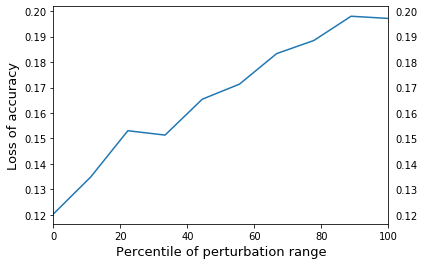

In [11]:
examine_local_fidelity(f_forest, f_X_test, f_y_test, framework='shap', count_per_step=100, epsilon=23, resolution=10)

Using 105 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


[0.1091428571428571,
 0.13657142857142868,
 0.1525714285714287,
 0.17076190476190478,
 0.1759047619047619,
 0.18714285714285717,
 0.17876190476190468,
 0.19904761904761914,
 0.19819047619047614,
 0.2127619047619047]

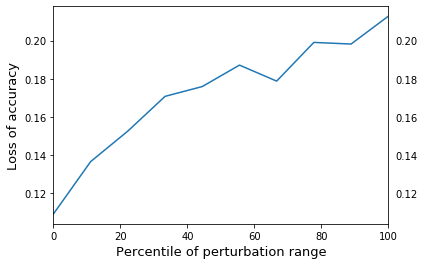

In [119]:
examine_local_fidelity(f_forest, f_X_test, f_y_test, framework='shap', count_per_step=100, epsilon=23, resolution=10, used_explainer=shap.KernelExplainer)

[0.10847619047619039,
 0.1321904761904762,
 0.15133333333333343,
 0.16952380952380952,
 0.17114285714285715,
 0.17333333333333345,
 0.175904761904762,
 0.17361904761904767,
 0.17514285714285727,
 0.18380952380952376]

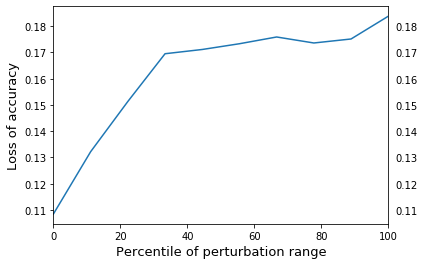

In [12]:
examine_local_fidelity(f_forest, f_X_test, f_y_test, framework='lime', count_per_step=100, epsilon=23, resolution=10)

In [54]:
f_X_train1, f_X_test1, f_y_train1, f_y_test1 = train_test_split(fico_X, fico_y, test_size=0.3, random_state=1)
f_forest1 = RandomForestClassifier()
f_forest1.fit(f_X_train1, f_y_train1)


f_X_train2, f_X_test2, f_y_train2, f_y_test2 = train_test_split(fico_X, fico_y, test_size=0.3, random_state=2)
f_forest2 = RandomForestClassifier()
f_forest2.fit(f_X_train2, f_y_train2)


f_X_train3, f_X_test3, f_y_train3, f_y_test3 = train_test_split(fico_X, fico_y, test_size=0.3, random_state=3)
f_forest3 = RandomForestClassifier()
f_forest3.fit(f_X_train3, f_y_train3)


f_X_train4, f_X_test4, f_y_train4, f_y_test4 = train_test_split(fico_X, fico_y, test_size=0.3, random_state=4)
f_forest4 = RandomForestClassifier()
f_forest4.fit(f_X_train4, f_y_train4)


f_X_train5, f_X_test5, f_y_train5, f_y_test5 = train_test_split(fico_X, fico_y, test_size=0.3, random_state=5)
f_forest5 = RandomForestClassifier()
f_forest5.fit(f_X_train5, f_y_train5)


f_X_train6, f_X_test6, f_y_train6, f_y_test6 = train_test_split(fico_X, fico_y, test_size=0.3, random_state=15)

# Iris 
Multi class clasification

In [13]:
iris_X, iris_y = sklearn.datasets.load_iris(return_X_y=True)
iris_X = pd.DataFrame(iris_X)
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

In [14]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(i_X_train, i_y_train)

tree_preds = tree.predict(i_X_test)
print(accuracy_score(i_y_test, tree_preds))


0.9666666666666667


In [15]:
i_forest_model = RandomForestClassifier()
i_forest_model.fit(i_X_train, i_y_train)
i_forest_preds = i_forest_model.predict(i_X_test)
print(accuracy_score(i_y_test, i_forest_preds))

1.0


In [108]:
i_l_model = LogisticRegression()
i_l_model.fit(i_X_train, i_y_train)
i_l_preds = i_l_model.predict(i_X_test)
print(accuracy_score(i_y_test, i_l_preds))

1.0


[0.07099999999999984,
 0.11333333333333295,
 0.19800000000000006,
 0.2696666666666667,
 0.3303333333333335,
 0.3700000000000001,
 0.42199999999999993,
 0.42799999999999994,
 0.4576666666666668,
 0.4873333333333334]

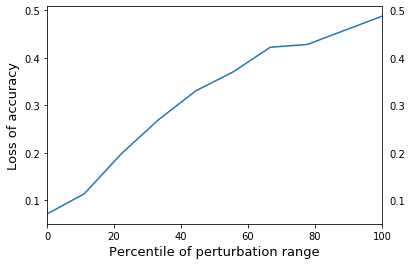

In [16]:
examine_local_fidelity(i_forest_model, i_X_test, i_y_test, framework='shap', count_per_step=100)

[0.18433333333333335,
 0.19066666666666687,
 0.24733333333333318,
 0.2786666666666666,
 0.33666666666666667,
 0.3643333333333334,
 0.3913333333333333,
 0.3893333333333334,
 0.41733333333333344,
 0.42133333333333345]

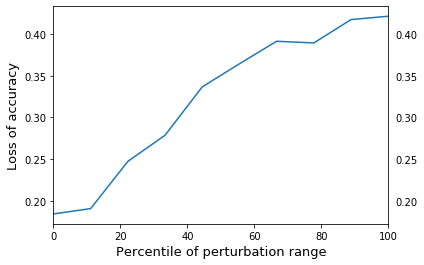

In [123]:
examine_local_fidelity(i_forest_model, i_X_test, i_y_test, framework='shap', count_per_step=100, used_explainer=shap.KernelExplainer)

[0.17033333333333334,
 0.19166666666666654,
 0.2466666666666667,
 0.29433333333333334,
 0.3315,
 0.3763333333333334,
 0.4005000000000001,
 0.4178333333333334,
 0.44133333333333336,
 0.4498333333333333]

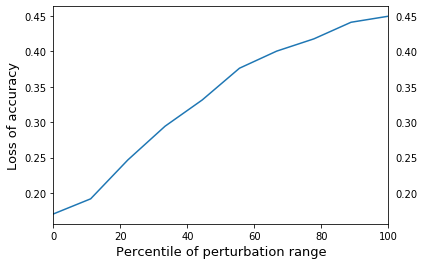

In [17]:
examine_local_fidelity(i_forest_model, i_X_test.iloc[:30], i_y_test[:30], framework='lime', count_per_step=200)

In [34]:
i_X_train1, i_X_test1, i_y_train1, i_y_test1 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=1)
i_forest_model1 = RandomForestClassifier()
i_forest_model1.fit(i_X_train1, i_y_train1)


i_X_train2, i_X_test2, i_y_train2, i_y_test2 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=2)
i_forest_model2 = RandomForestClassifier()
i_forest_model2.fit(i_X_train2, i_y_train2)


i_X_train3, i_X_test3, i_y_train3, i_y_test3 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=3)
i_forest_model3 = RandomForestClassifier()
i_forest_model3.fit(i_X_train3, i_y_train3)


i_X_train4, i_X_test4, i_y_train4, i_y_test4 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=4)
i_forest_model4 = RandomForestClassifier()
i_forest_model4.fit(i_X_train4, i_y_train4)


i_X_train5, i_X_test5, i_y_train5, i_y_test5 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=5)
i_forest_model5 = RandomForestClassifier()
i_forest_model5.fit(i_X_train5, i_y_train5)


i_X_train6, i_X_test6, i_y_train6, i_y_test6 = train_test_split(iris_X, iris_y, test_size=0.3, random_state=15)

# Wine
Multi class classification, 13 features

In [19]:
wine_X, wine_y = sklearn.datasets.load_wine(return_X_y=True)

wine_scaler = sklearn.preprocessing.StandardScaler()
wine_scaler.fit(wine_X)
wine_X = wine_scaler.transform(wine_X)

wine_X = pd.DataFrame(wine_X)
w_X_train, w_X_test, w_y_train, w_y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

In [20]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(w_X_train, w_y_train)

tree_preds = tree.predict(w_X_test)
print(accuracy_score(w_y_test, tree_preds))

0.8611111111111112


In [21]:
w_forest_model = RandomForestClassifier()
w_forest_model.fit(w_X_train, w_y_train)
w_forest_preds = w_forest_model.predict(w_X_test)
print(accuracy_score(w_y_test, w_forest_preds))

0.9444444444444444


[0.08499999999999985,
 0.14444444444444438,
 0.23250000000000004,
 0.2813888888888888,
 0.31305555555555553,
 0.32972222222222225,
 0.35138888888888875,
 0.3502777777777778,
 0.3586111111111111,
 0.3861111111111112]

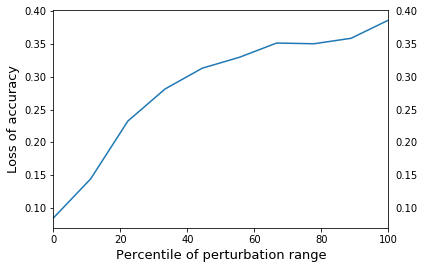

In [28]:
examine_local_fidelity(w_forest_model, w_X_test, w_y_test, framework='shap', count_per_step=100, epsilon=20)

[0.10916666666666675,
 0.17194444444444446,
 0.22527777777777802,
 0.2827777777777777,
 0.32333333333333325,
 0.3383333333333334,
 0.3538888888888888,
 0.34444444444444444,
 0.35611111111111104,
 0.3747222222222222]

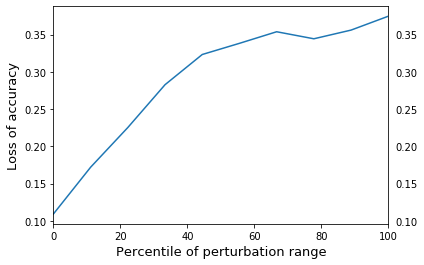

In [120]:
examine_local_fidelity(w_forest_model, w_X_test, w_y_test, framework='shap', count_per_step=100, epsilon=20, used_explainer=shap.KernelExplainer)

[0.13559999999999972,
 0.19799999999999995,
 0.26880000000000004,
 0.2996000000000001,
 0.3128000000000001,
 0.36040000000000005,
 0.3635999999999999,
 0.38959999999999995,
 0.3712,
 0.3659999999999999]

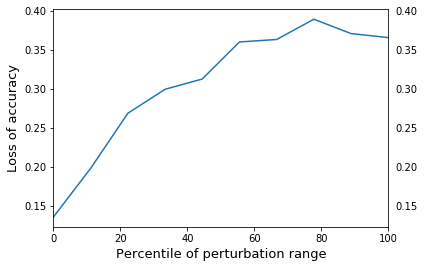

In [29]:
examine_local_fidelity(w_forest_model, w_X_test.iloc[:25], w_y_test[:25], framework='lime', count_per_step=100, epsilon=20)

In [35]:
w_X_train1, w_X_test1, w_y_train1, w_y_test1 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=1)
w_forest_model1 = RandomForestClassifier()
w_forest_model1.fit(w_X_train1, w_y_train1)


w_X_train2, w_X_test2, w_y_train2, w_y_test2 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=2)
w_forest_model2 = RandomForestClassifier()
w_forest_model2.fit(w_X_train2, w_y_train2)


w_X_train3, w_X_test3, w_y_train3, w_y_test3 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=3)
w_forest_model3 = RandomForestClassifier()
w_forest_model3.fit(w_X_train3, w_y_train3)


w_X_train4, w_X_test4, w_y_train4, w_y_test4 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=4)
w_forest_model4 = RandomForestClassifier()
w_forest_model4.fit(w_X_train4, w_y_train4)


w_X_train5, w_X_test5, w_y_train5, w_y_test5 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=5)
w_forest_model5 = RandomForestClassifier()
w_forest_model5.fit(w_X_train5, w_y_train5)

w_X_train6, w_X_test6, w_y_train6, w_y_test6 = train_test_split(wine_X, wine_y, test_size=0.2, random_state=6)

# Breast cancer
Binary classification
30 features

In [30]:
b_X, b_y = sklearn.datasets.load_breast_cancer(return_X_y=True)

b_scaler = sklearn.preprocessing.StandardScaler()
b_scaler.fit(b_X)
b_X = b_scaler.transform(b_X)

b_X = pd.DataFrame(b_X)
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, test_size=0.2, random_state=42)

In [31]:
b_lreg = LogisticRegression()
b_lreg.fit(b_X_train, b_y_train)

b_lreg_preds = b_lreg.predict(b_X_test)
print(accuracy_score(b_y_test, b_lreg_preds))

0.9736842105263158


In [32]:
b_tree = DecisionTreeClassifier(max_depth=4)
b_tree.fit(b_X_train, b_y_train)

b_tree_preds = b_tree.predict(b_X_test)
print(accuracy_score(b_y_test, b_tree_preds))

0.9473684210526315


In [33]:
b_forest = RandomForestClassifier()
b_forest.fit(b_X_train, b_y_train)

b_forest_preds = b_forest.predict(b_X_test)
print(accuracy_score(b_y_test, b_forest_preds))

0.9473684210526315


[0.09657894736842121,
 0.1384210526315791,
 0.1875438596491228,
 0.22333333333333316,
 0.24078947368421033,
 0.25850877192982424,
 0.27421052631578924,
 0.29192982456140326,
 0.2990350877192981,
 0.3057017543859648]

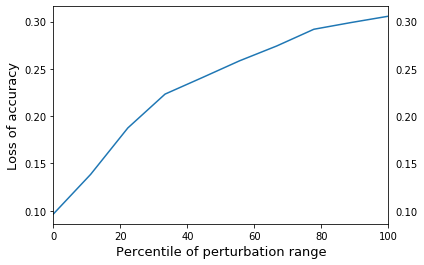

In [37]:
examine_local_fidelity(b_forest, b_X_test, b_y_test, count_per_step=100, framework='shap', epsilon=35)

Using 114 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


[0.08166666666666678,
 0.15596491228070175,
 0.20543859649122798,
 0.23368421052631583,
 0.26517543859649095,
 0.28412280701754367,
 0.2883333333333332,
 0.3107017543859649,
 0.3151754385964912,
 0.3349122807017543]

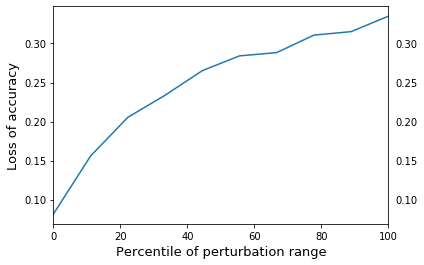

In [124]:
examine_local_fidelity(b_forest, b_X_test, b_y_test, count_per_step=100, framework='shap', epsilon=35, used_explainer=shap.KernelExplainer)

[0.10288888888888892,
 0.14088888888888873,
 0.19199999999999995,
 0.23422222222222233,
 0.23777777777777775,
 0.2597777777777781,
 0.2639999999999999,
 0.2684444444444445,
 0.2786666666666666,
 0.2924444444444444]

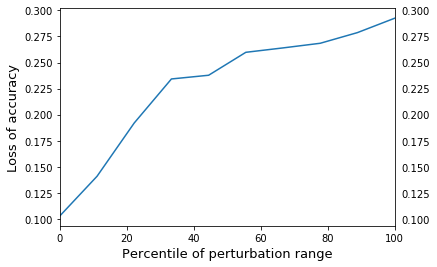

In [40]:
examine_local_fidelity(b_forest, b_X_test.iloc[:45], b_y_test[:45], framework='lime', count_per_step=100, epsilon=35)

In [41]:
b_X_train1, b_X_test1, b_y_train1, b_y_test1 = train_test_split(b_X, b_y, test_size=0.2, random_state=1)
b_forest_model1 = RandomForestClassifier()
b_forest_model1.fit(b_X_train1, b_y_train1)


b_X_train2, b_X_test2, b_y_train2, b_y_test2 = train_test_split(b_X, b_y, test_size=0.2, random_state=2)
b_forest_model2 = RandomForestClassifier()
b_forest_model2.fit(b_X_train2, b_y_train2)


b_X_train3, b_X_test3, b_y_train3, b_y_test3 = train_test_split(b_X, b_y, test_size=0.2, random_state=3)
b_forest_model3 = RandomForestClassifier()
b_forest_model3.fit(b_X_train3, b_y_train3)


b_X_train4, b_X_test4, b_y_train4, b_y_test4 = train_test_split(b_X, b_y, test_size=0.2, random_state=4)
b_forest_model4 = RandomForestClassifier()
b_forest_model4.fit(b_X_train4, b_y_train4)


b_X_train5, b_X_test5, b_y_train5, b_y_test5 = train_test_split(b_X, b_y, test_size=0.2, random_state=5)
b_forest_model5 = RandomForestClassifier()
b_forest_model5.fit(b_X_train5, b_y_train5)


b_X_train6, b_X_test6, b_y_train6, b_y_test6 = train_test_split(b_X, b_y, test_size=0.2, random_state=15)

# Lipschitz values

In [42]:
b_shap_l_vals = get_lipschitz(b_forest, b_X_test, b_y_test, epsilon=3, sample_num=30)
b_lime_l_vals = get_lipschitz(b_forest, b_X_test, b_y_test, epsilon=3, framework='lime', sample_num=30)

w_shap_l_vals = get_lipschitz(w_forest_model, w_X_test, w_y_test, epsilon=3, sample_num=30)
w_lime_l_vals = get_lipschitz(w_forest_model, w_X_test, w_y_test, epsilon=3, framework='lime', sample_num=30)

i_shap_l_vals = get_lipschitz(i_forest_model, i_X_test, i_y_test, epsilon=3, sample_num=30)
i_lime_l_vals = get_lipschitz(i_forest_model, i_X_test, i_y_test, epsilon=3, framework='lime', sample_num=30)

f_shap_l_vals = get_lipschitz(f_forest, f_X_test, f_y_test, epsilon=3, sample_num=30)
f_lime_l_vals = get_lipschitz(f_forest, f_X_test, f_y_test, epsilon=3, framework='lime', sample_num=30)

In [47]:
print(len(b_lime_l_vals))
print(len(b_shap_l_vals))
print(len(w_lime_l_vals))
print(len(w_shap_l_vals))
print(len(i_lime_l_vals))
print(len(i_shap_l_vals))

20
22
28
28
30
30


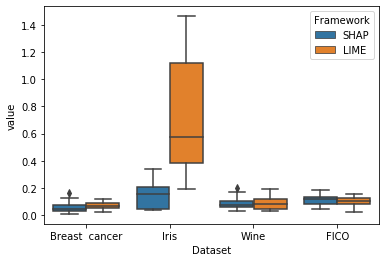

In [78]:
results_df = pd.DataFrame(columns=('Dataset', 'SHAP', 'LIME'))


b_df = pd.DataFrame(data={'SHAP': b_shap_l_vals[:20], 'LIME': b_lime_l_vals[:20]})
b_df['Dataset'] = 'Breast  cancer'
results_df = results_df.append(b_df, ignore_index=True)


i_df = pd.DataFrame(data={'SHAP': i_shap_l_vals[:20], 'LIME': i_lime_l_vals[:20]})
i_df['Dataset'] = 'Iris'
results_df = results_df.append(i_df, ignore_index=True)


w_df = pd.DataFrame(data={'SHAP': w_shap_l_vals[:20], 'LIME': w_lime_l_vals[:20]})
w_df['Dataset'] = 'Wine'
results_df = results_df.append(w_df, ignore_index=True)


f_df = pd.DataFrame(data={'SHAP': f_shap_l_vals[:20], 'LIME': f_lime_l_vals[:20]})
f_df['Dataset'] = 'FICO'
results_df = results_df.append(f_df, ignore_index=True)


dd = pd.melt(results_df, id_vars=['Dataset'], value_vars=['SHAP','LIME'], var_name='Framework')
sns.boxplot(x='Dataset', y='value', data=dd, hue='Framework')


Text(0, 0.5, 'Lipschitz estimates')

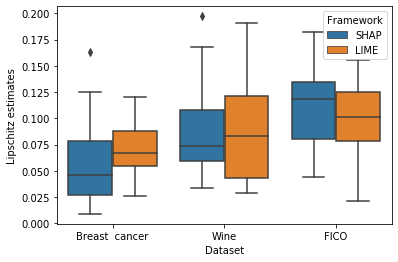

In [84]:
results_df = pd.DataFrame(columns=('Dataset', 'SHAP', 'LIME'))


b_df = pd.DataFrame(data={'SHAP': b_shap_l_vals[:20], 'LIME': b_lime_l_vals[:20]})
b_df['Dataset'] = 'Breast  cancer'
results_df = results_df.append(b_df, ignore_index=True)

w_df = pd.DataFrame(data={'SHAP': w_shap_l_vals[:20], 'LIME': w_lime_l_vals[:20]})
w_df['Dataset'] = 'Wine'
results_df = results_df.append(w_df, ignore_index=True)


f_df = pd.DataFrame(data={'SHAP': f_shap_l_vals[:20], 'LIME': f_lime_l_vals[:20]})
f_df['Dataset'] = 'FICO'
results_df = results_df.append(f_df, ignore_index=True)


dd = pd.melt(results_df, id_vars=['Dataset'], value_vars=['SHAP','LIME'], var_name='Framework')
sns.boxplot(x='Dataset', y='value', data=dd, hue='Framework')
plt.ylabel('Lipschitz estimates')


Text(0, 0.5, 'Lipschitz estimates')

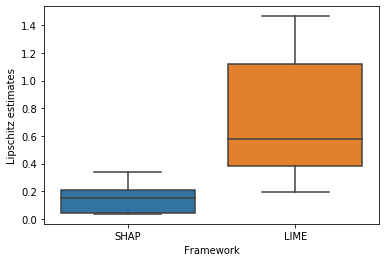

In [86]:
cons_df = pd.DataFrame({'SHAP':i_shap_l_vals[:20], 'LIME':i_lime_l_vals[:20]})
sns.boxplot(x="variable", y="value", data=pd.melt(cons_df))
plt.xlabel('Framework')
plt.ylabel('Lipschitz estimates')

# Checking consistency

In [75]:
f_models = [f_forest1, f_forest2, f_forest3, f_forest4, f_forest5]
w_models = [w_forest_model1, w_forest_model2, w_forest_model3, w_forest_model4, w_forest_model5]
b_models = [b_forest_model1, b_forest_model2, b_forest_model3, b_forest_model4, b_forest_model5]
i_models = [i_forest_model1, i_forest_model2, i_forest_model3, i_forest_model4, i_forest_model5]


w_shap_c = check_consistency(w_models, w_X_test6, w_y_test6, sample_num=30)
w_lime_c = check_consistency(w_models, w_X_test6, w_y_test6, sample_num=30, framework='lime')


f_shap_c = check_consistency(f_models, f_X_test6, f_y_test6.values, sample_num=30)
f_lime_c = check_consistency(f_models, f_X_test6, f_y_test6.values, sample_num=30, framework='lime')

b_shap_c = check_consistency(b_models, b_X_test6, b_y_test6, sample_num=30)
b_lime_c = check_consistency(b_models, b_X_test6, b_y_test6, sample_num=30, framework='lime')

i_shap_c = check_consistency(i_models, i_X_test6, i_y_test6, sample_num=30)
i_lime_c = check_consistency(i_models, i_X_test6, i_y_test6, sample_num=30, framework='lime')


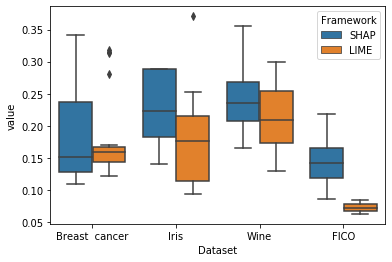

In [80]:
results_df = pd.DataFrame(columns=('Dataset', 'SHAP', 'LIME'))

b_df = pd.DataFrame(data={'SHAP': b_shap_c[:20], 'LIME': b_lime_c[:20]})
b_df['Dataset'] = 'Breast  cancer'

results_df = results_df.append(b_df, ignore_index=True)

i_df = pd.DataFrame(data={'SHAP': i_shap_c[:20], 'LIME': i_lime_c[:20]})
i_df['Dataset'] = 'Iris'

results_df = results_df.append(i_df, ignore_index=True)

w_df = pd.DataFrame(data={'SHAP': w_shap_c[:20], 'LIME': w_lime_c[:20]})
w_df['Dataset'] = 'Wine'

results_df = results_df.append(w_df, ignore_index=True)

f_df = pd.DataFrame(data={'SHAP': f_shap_c[:20], 'LIME': f_lime_c[:20]})
f_df['Dataset'] = 'FICO'

results_df = results_df.append(f_df, ignore_index=True)

dd = pd.melt(results_df, id_vars=['Dataset'], value_vars=['SHAP','LIME'], var_name='Framework')
sns.boxplot(x='Dataset', y='value', data=dd, hue='Framework')

Text(0, 0.5, 'Consistency values')

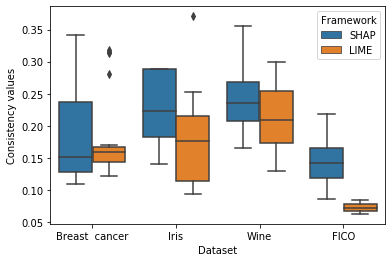

In [85]:
results_df = pd.DataFrame(columns=('Dataset', 'SHAP', 'LIME'))


b_df = pd.DataFrame(data={'SHAP': b_shap_c[:20], 'LIME': b_lime_c[:20]})
b_df['Dataset'] = 'Breast  cancer'
results_df = results_df.append(b_df, ignore_index=True)


i_df = pd.DataFrame(data={'SHAP': i_shap_c[:20], 'LIME': i_lime_c[:20]})
i_df['Dataset'] = 'Iris'
results_df = results_df.append(i_df, ignore_index=True)


w_df = pd.DataFrame(data={'SHAP': w_shap_c[:20], 'LIME': w_lime_c[:20]})
w_df['Dataset'] = 'Wine'
results_df = results_df.append(w_df, ignore_index=True)


f_df = pd.DataFrame(data={'SHAP': f_shap_c[:20], 'LIME': f_lime_c[:20]})
f_df['Dataset'] = 'FICO'
results_df = results_df.append(f_df, ignore_index=True)


dd = pd.melt(results_df, id_vars=['Dataset'], value_vars=['SHAP','LIME'], var_name='Framework')
sns.boxplot(x='Dataset', y='value', data=dd, hue='Framework')
plt.ylabel('Consistency values')